In [ ]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Model # for creating assembling a Neural Network model
from keras import Input # for instantiating a keras tensor and specifying input dimensions
from keras.layers import Dense, Lambda,Flatten # adding layers to the Neural Network model
from tensorflow.keras.utils import plot_model # for plotting model diagram
from keras import backend as K # for access to Keras backend for reparameterization and creating custom loss function

# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version
import plotly
import plotly.express as px # for data visualization
print('plotly: %s' % plotly.__version__) # print version
import tensorflow as tf
# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
# Tensorflow / Keras
from skimage.transform import resize
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from numpy import vstack
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from matplotlib import pyplot
from numpy import expand_dims
from keras import backend
#print('Tensorflow/Keras: %s' % keras.__version__)
from keras.models import Model
from keras.datasets.mnist import load_data
# prepare the inception v3 model
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np
import pandas as pd
#print(main_dir)

Tensorflow/Keras: 2.12.0
numpy: 1.22.4
matplotlib: 3.7.1
graphviz: 0.20.1
plotly: 5.13.1


In [ ]:
# Load digits data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Normalize input data (divide by 255) 
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255



Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


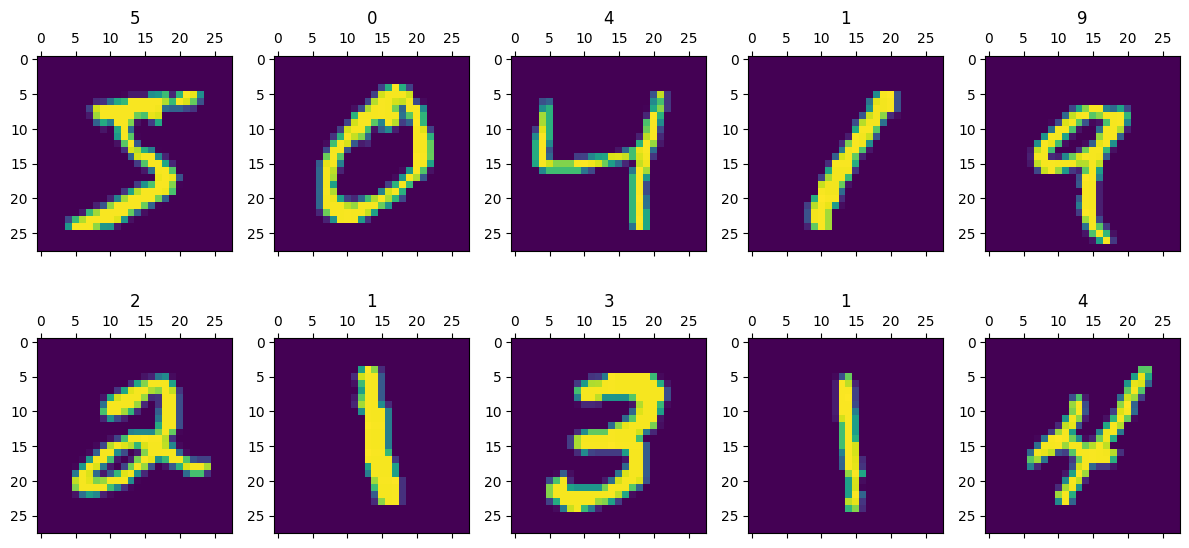

In [ ]:
# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

In [ ]:
# Reshape input data
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)

# Print shapes
print("New shape of X_train: ", X_train_flat.shape)
print("New shape of X_test: ", X_test_flat.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


In [ ]:
# initial parameters
learning_rate = 0.001
batch_size = 256
epoch_number = 100
hidden_dim = 64


In [ ]:
class model():

  def __init__(self):
    self.x = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='x')
    self.y = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='y')
    self.train_mode = tf.compat.v1.placeholder(tf.bool, name="train_mode")

  def encoder(self, hidden_dim):
    print("----- Encoder -----")
    print("input hidden_dim: ", hidden_dim)
    print("input x: ", self.x.shape)

    lstm, _ = tf.compat.v1.nn.dynamic_rnn(tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_dim), self.x, dtype=tf.float32)
    print("lstm: ", lstm.shape)
    flatten_lstm = tf.keras.layers.Flatten()(lstm)
    print("flatten_lstm: ", flatten_lstm.shape)

    mu = tf.keras.layers.Dense(units=hidden_dim, activation=tf.nn.relu)(flatten_lstm)
    sigma = 0.5 * tf.keras.layers.Dense(units=hidden_dim)(flatten_lstm)
    epsilon = tf.random.normal(tf.stack([tf.shape(flatten_lstm)[0], hidden_dim]))
    z = mu + tf.multiply(epsilon, tf.exp(sigma))   
    print("mu: ", mu.shape)
    print("sigma: ", sigma.shape)
    print("epsilon: ", epsilon.shape)
    print("z: ", z.shape)

    return self.x, self.y, self.train_mode, z, mu, sigma


  def decoder(self, z):
    print("----- Decoder -----")
    print("input z: ", z.shape)
    reshaped_dimension = [-1, 14, 14, 1]

    fc1 = tf.keras.layers.Dense(units=98, activation=tf.nn.relu)(z)
    print("1. fc: ", fc1.shape)
    fc2 = tf.keras.layers.Dense(units=196, activation=tf.nn.relu)(fc1)
    print("2. fc: ", fc2.shape)

    reshaped_fc2 = tf.reshape(fc2, reshaped_dimension)
    print("2. reshaped_fc: ", reshaped_fc2.shape)

    tconv1 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)(reshaped_fc2)
    dropout1 = tf.keras.layers.Dropout(rate=0.75)(tconv1)
    print("3. tconv: ", tconv1.shape)
    print("3. dropout: ", dropout1.shape)

    tconv2 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)(dropout1)
    dropout2 = tf.keras.layers.Dropout(rate=0.75)(tconv2)
    print("4. tconv: ", tconv2.shape)
    print("4. dropout: ", dropout2.shape)

    tconv3 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same', activation=tf.nn.relu)(dropout2)
    #dropout3 = tf.layers.dropout(tconv3, rate=0.75, training=self.train_mode)
    print("5. tconv: ", tconv3.shape)
    #print("5. dropout: ", dropout3.shape)

    flatten_tconv3 = tf.keras.layers.Flatten()(tconv3)
    print("5. flatten_tconv: ", flatten_tconv3.shape)

    fc3 = tf.keras.layers.Dense(units=28*28, activation=tf.nn.sigmoid)(flatten_tconv3)
    print("6. fc: ", fc3.shape)

    reshaped_output = tf.reshape(fc3, shape=[-1, 28, 28])
    print("6. reshaped_output: ", reshaped_output.shape)

    return reshaped_output


  def loss(self, decoder, mu, sigma):
    flatten_y = tf.reshape(self.y, shape=[-1, 28 * 28])
    unreshaped = tf.reshape(decoder, [-1, 28 * 28])
    unreshaped = tf.clip_by_value(unreshaped, 1e-7, 1-1e-7) # clipping is added for bce loss problems

    # binary cross entropy loss (reconstruction loss)
    bce_loss = tf.reduce_sum(-flatten_y*tf.math.log(unreshaped)-(1.0 - flatten_y)*tf.math.log(1.0 - unreshaped), axis=1)

    # kl divergence loss:
    kl_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sigma - tf.square(mu) - tf.exp(2.0 * sigma), axis=1)

    # general loss
    general_loss = tf.reduce_mean(bce_loss + kl_loss, axis=0)

    return general_loss, bce_loss, kl_loss


  def optimizer(self, loss, learning_rate):
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
    return optimizer


In [ ]:
#import tensorflow_datasets
#mnist = tensorflow_datasets.load('mnist')
def scale_images(images, new_shape=(299,299,3)):
    images_list = list()
    for image in images:
 # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
 # store
        images_list.append(new_image)
    return asarray(images_list)
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = numpy.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

In [ ]:
# vae model
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
model = model()
x, y, train_mode, z, mu, sigma = model.encoder(hidden_dim)
decoder_output = model.decoder(z)
general_loss, rec_loss, kl_loss = model.loss(decoder_output, mu, sigma)
train_optimizer = model.optimizer(general_loss, learning_rate)

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())
print("-> Session is started.")

<ipython-input-4-1706c7fd7400>:13: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstm, _ = tf.compat.v1.nn.dynamic_rnn(tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_dim), self.x, dtype=tf.float32)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


----- Encoder -----
input hidden_dim:  64
input x:  (None, 28, 28)
lstm:  (None, 28, 64)
flatten_lstm:  (None, 1792)
mu:  (None, 64)
sigma:  (None, 64)
epsilon:  (None, 64)
z:  (None, 64)
----- Decoder -----
input z:  (None, 64)
1. fc:  (None, 98)
2. fc:  (None, 196)
2. reshaped_fc:  (None, 14, 14, 1)
3. tconv:  (None, 14, 14, 32)
3. dropout:  (None, 14, 14, 32)
4. tconv:  (None, 14, 14, 64)
4. dropout:  (None, 14, 14, 64)
5. tconv:  (None, 28, 28, 64)
5. flatten_tconv:  (None, 50176)
6. fc:  (None, 784)
6. reshaped_output:  (None, 28, 28)
-> Session is started.


In [ ]:
model_fid = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# main training loop
plot_general_loss_, plot_rec_loss_, plot_kl_loss_, FID_epoch = [], [], [],[]

for epoch in range(epoch_number):

    number_of_batch = int(len(X_train) / batch_size)

    general_loss_, rec_loss_, kl_loss_,fid_batch = 0, 0, 0, 0

    for i in range(number_of_batch):

        batch = X_train[i*batch_size:(i+1)*batch_size]  # we take only data (not labels)
        batch = np.reshape(batch, [-1, 28, 28])  # reshape the data

        # train the network for one batch
        _, general_loss_, rec_loss_, kl_loss_, decoder_ = sess.run(
            [train_optimizer, general_loss, rec_loss, kl_loss, decoder_output],
            feed_dict={x: batch, y: batch, train_mode: True})
        
        if i == number_of_batch-1 and epoch%10==0: # For FID values
            randoms = [np.random.normal(0, 1, hidden_dim) for _ in range(100)]
            decoder_images = sess.run(decoder_output, feed_dict = {z: randoms, train_mode: False})
            #plt.imshow[decoder_images[0]]
            images1=scale_images(batch,new_shape=(299,299,3))
            images2=scale_images(decoder_images,new_shape=(299,299,3))
            fid_batch = calculate_fid(model_fid,images1,images2)
            print("Fid Value:",fid_batch)
            FID_epoch.append(fid_batch)
        if i == 0: # at the end of the each epoch, or at the beginning.
            print(
                "|--- Epoch: {} \t---> General loss: {:.2f} | Reconstruction loss: {:.2f} | KL-divergence loss: {:.2f}".format(
                    epoch, general_loss_, np.mean(rec_loss_), np.mean(kl_loss_)))

            plot_general_loss_.append(general_loss_)
            plot_rec_loss_.append(np.mean(rec_loss_))
            plot_kl_loss_.append(np.mean(kl_loss_))
            #FID_epoch.append(fid_batch)

Instructions for updating:
Colocations handled automatically by placer.


87910968/87910968 [==============================] - 1s 0us/step
|--- Epoch: 0 	---> General loss: 544.18 | Reconstruction loss: 543.59 | KL-divergence loss: 0.59


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Fid Value: 198.64397215973392
|--- Epoch: 1 	---> General loss: 167.08 | Reconstruction loss: 152.77 | KL-divergence loss: 14.31
|--- Epoch: 2 	---> General loss: 137.43 | Reconstruction loss: 116.29 | KL-divergence loss: 21.14
|--- Epoch: 3 	---> General loss: 125.66 | Reconstruction loss: 102.06 | KL-divergence loss: 23.61
|--- Epoch: 4 	---> General loss: 121.22 | Reconstruction loss: 96.75 | KL-divergence loss: 24.47
|--- Epoch: 5 	---> General loss: 116.54 | Reconstruction loss: 91.15 | KL-divergence loss: 25.39
|--- Epoch: 6 	---> General loss: 114.07 | Reconstruction loss: 87.61 | KL-divergence loss: 26.46
|--- Epoch: 7 	---> General loss: 111.47 | Reconstruction loss: 84.66 | KL-divergence loss: 26.81
|--- Epoch: 8 	---> General loss: 110.56 | Reconstruction loss: 84.02 | KL-divergence loss: 26.55
|--- Epoch: 9 	---> General loss: 109.61 | Reconstruction loss: 83.01 | KL-divergence loss: 26.60
|--- Epoch: 10 	---> General loss: 108.97 | Reconstruction loss: 81.77 | KL-divergenc

In [ ]:
'''
# main training loop
epoch_number=100
plot_general_loss_, plot_rec_loss_, plot_kl_loss_ = [], [], []
print("-> Training is started.")
for epoch in range(epoch_number):

    number_of_batch = int(len(X_train) / batch_size)

    general_loss_, rec_loss_, kl_loss_ = 0, 0, 0

    for i in range(number_of_batch):

        batch = X_train[i*batch_size:(i+1)*batch_size]  # we take only data (not labels)
        batch = np.reshape(batch, [-1, 28, 28])  # reshape the data

        # train the network for one batch
        _, general_loss_, rec_loss_, kl_loss_, decoder_ = sess.run(
            [train_optimizer, general_loss, rec_loss, kl_loss, decoder_output],
            feed_dict={x: batch, y: batch, train_mode: True})

        if i == 0:
            print(
                "|--- Epoch: {} \t---> General loss: {:.2f} | Reconstruction loss: {:.2f} | KL-divergence loss: {:.2f}".format(
                    epoch, general_loss_, np.mean(rec_loss_), np.mean(kl_loss_)))

            plot_general_loss_.append(general_loss_)
            plot_rec_loss_.append(np.mean(rec_loss_))
            plot_kl_loss_.append(np.mean(kl_loss_))


-> Training is started.
|--- Epoch: 0 	---> General loss: 543.96 | Reconstruction loss: 543.56 | KL-divergence loss: 0.40
|--- Epoch: 1 	---> General loss: 161.59 | Reconstruction loss: 145.73 | KL-divergence loss: 15.86
|--- Epoch: 2 	---> General loss: 135.14 | Reconstruction loss: 112.64 | KL-divergence loss: 22.50
|--- Epoch: 3 	---> General loss: 124.45 | Reconstruction loss: 99.34 | KL-divergence loss: 25.11
|--- Epoch: 4 	---> General loss: 119.20 | Reconstruction loss: 92.99 | KL-divergence loss: 26.21
|--- Epoch: 5 	---> General loss: 115.83 | Reconstruction loss: 89.50 | KL-divergence loss: 26.33
|--- Epoch: 6 	---> General loss: 113.75 | Reconstruction loss: 87.25 | KL-divergence loss: 26.50
|--- Epoch: 7 	---> General loss: 112.08 | Reconstruction loss: 85.21 | KL-divergence loss: 26.86
|--- Epoch: 8 	---> General loss: 110.16 | Reconstruction loss: 82.95 | KL-divergence loss: 27.21
|--- Epoch: 9 	---> General loss: 109.89 | Reconstruction loss: 82.08 | KL-divergence loss: 

In [ ]:
# Created to plot convergence curves based on and loss values obtained during training
def plot_curves(plot_general_loss_, plot_rec_loss_, plot_kl_loss_, epoch_number):
    plot_general_loss_, plot_rec_loss_, plot_kl_loss_ = np.array(plot_general_loss_), np.array(
        plot_rec_loss_), np.array(plot_kl_loss_)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot()
    ax.set_xlabel('epochs')
    ax.tick_params()

    ax.plot(plot_general_loss_, label='general loss')
    ax.plot(plot_rec_loss_, label='reconstruction loss')
    ax.plot(plot_kl_loss_, label='kl-divergence loss')

    ax.set_ylabel("loss")
    ax.legend(loc='upper right')

    plt.grid()
    file_name = "loss_curves.png"
    plt.savefig(file_name)
    print("-> Plot of loss curves are saved.")

-> Plot of loss curves are saved.


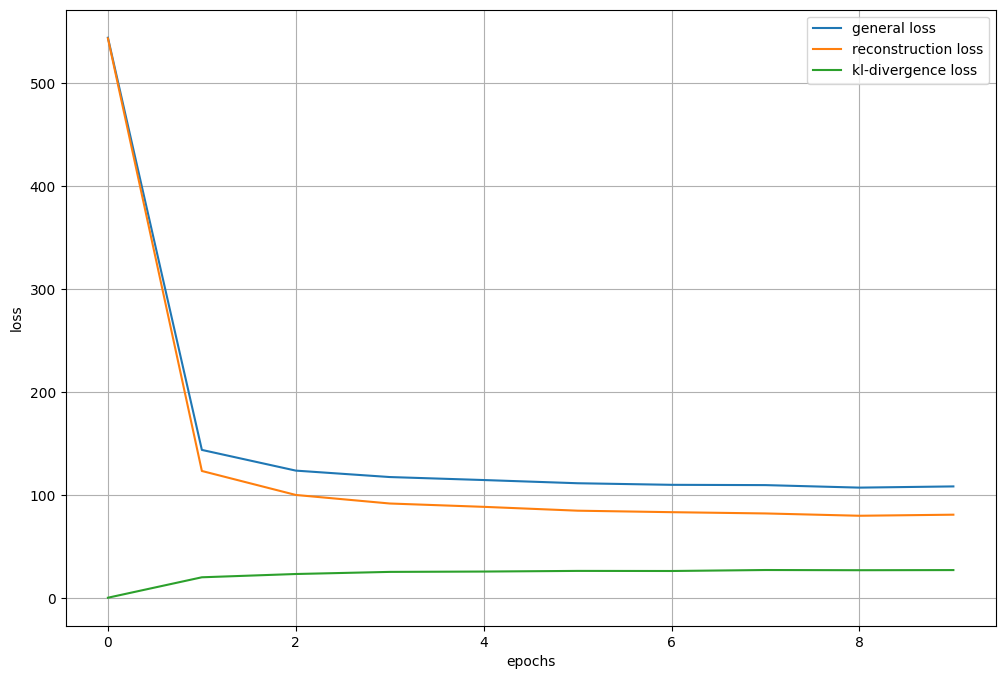

In [ ]:
plot_curves(plot_general_loss_, plot_rec_loss_, plot_kl_loss_, epoch_number)

In [ ]:
import pandas as pd
def plot_loss(plot_general_loss_,plot_rec_loss_,plot_kl_loss_,epochs):
  loss_frame = pd.DataFrame({"Total Loss":plot_general_loss_,"Reconstruction Loss":plot_rec_loss_,"KL-Divergence Loss":plot_kl_loss_})
  plot = loss_frame.plot(xlabel="Epochs",ylabel="Loss")
  plt.figure(figsize=(10, 6))
  plt.savefig("plot_loss_VAE_")
  return plot

<Axes: xlabel='Epochs', ylabel='Loss'>

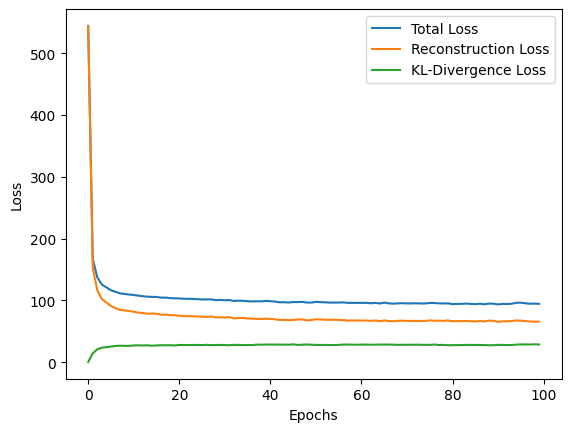

<Figure size 1000x600 with 0 Axes>

In [ ]:
epochs=100
plot_loss(plot_general_loss_,plot_rec_loss_,plot_kl_loss_,epochs)

### MODEL SAVE

In [ ]:
# save model
saver = tf.compat.v1.train.Saver()
saver.save(sess, "./Model_VAE_100")
print("-> Model is saved.")

-> Model is saved.


In [ ]:
sess.close()

In [ ]:
def plot_fid(fid_values,epoch=100):
  epoch_list=[]
  for i in range(epoch):
    if i%10==0:
      epoch_list.append(i)
  #epoch_list = [i if i+1%10==0 else continue for i in range(epoch)]
  ax = plt.figure(figsize=(10,6))
  #gs = gridspec.GridSpec(2, 2)
  plot = plt.plot(epoch_list,fid_values)
  #ax = fig.add_subplot()
  #ax.plot(fid_values,label="FID Values",)
  plt.ylabel('FID Value')
  plt.xlabel('Epochs')
  plt.savefig("Fid_Plot_fİrst")

  return plot


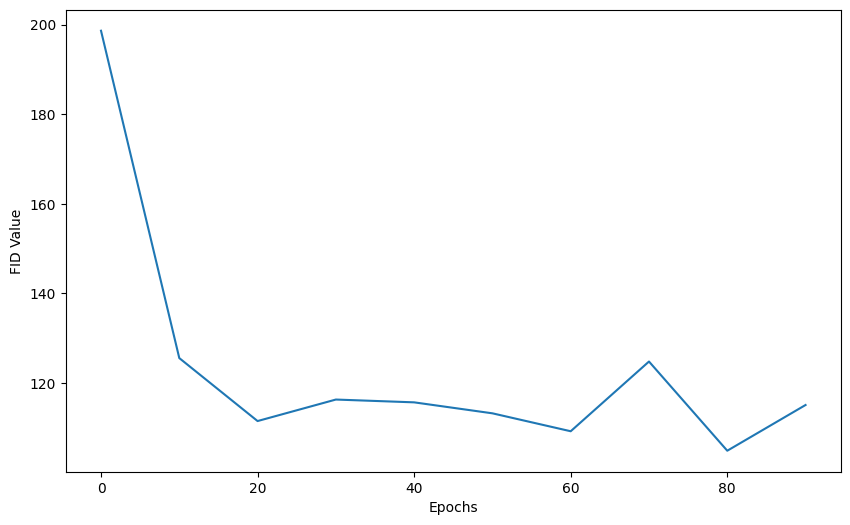

In [ ]:
plot_fid(FID_epoch,epoch=100)

### GENERATOR

In [ ]:
class model():

  def __init__(self):
    self.x = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='x')
    self.y = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='y')
    self.train_mode = tf.compat.v1.placeholder(tf.bool, name="train_mode")

  def encoder(self, hidden_dim):
    print("----- Encoder -----")
    print("input hidden_dim: ", hidden_dim)
    print("input x: ", self.x.shape)

    lstm, _ = tf.compat.v1.nn.dynamic_rnn(tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_dim), self.x, dtype=tf.float32)
    print("lstm: ", lstm.shape)
    flatten_lstm = tf.keras.layers.Flatten()(lstm)
    print("flatten_lstm: ", flatten_lstm.shape)

    mu = tf.keras.layers.Dense(units=hidden_dim, activation=tf.nn.relu)(flatten_lstm)
    sigma = 0.5 * tf.keras.layers.Dense(units=hidden_dim)(flatten_lstm)
    epsilon = tf.random.normal(tf.stack([tf.shape(flatten_lstm)[0], hidden_dim]))
    z = mu + tf.multiply(epsilon, tf.exp(sigma))   
    print("mu: ", mu.shape)
    print("sigma: ", sigma.shape)
    print("epsilon: ", epsilon.shape)
    print("z: ", z.shape)

    return self.x, self.y, self.train_mode, z, mu, sigma


  def decoder(self, z):
    print("----- Decoder -----")
    print("input z: ", z.shape)
    reshaped_dimension = [-1, 14, 14, 1]

    fc1 = tf.keras.layers.Dense(units=98, activation=tf.nn.relu)(z)
    print("1. fc: ", fc1.shape)
    fc2 = tf.keras.layers.Dense(units=196, activation=tf.nn.relu)(fc1)
    print("2. fc: ", fc2.shape)

    reshaped_fc2 = tf.reshape(fc2, reshaped_dimension)
    print("2. reshaped_fc: ", reshaped_fc2.shape)

    tconv1 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)(reshaped_fc2)
    dropout1 = tf.keras.layers.Dropout(rate=0.75)(tconv1)
    print("3. tconv: ", tconv1.shape)
    print("3. dropout: ", dropout1.shape)

    tconv2 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=1, padding='same', activation=tf.nn.relu)(dropout1)
    dropout2 = tf.keras.layers.Dropout(rate=0.75)(tconv2)
    print("4. tconv: ", tconv2.shape)
    print("4. dropout: ", dropout2.shape)

    tconv3 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same', activation=tf.nn.relu)(dropout2)
    #dropout3 = tf.layers.dropout(tconv3, rate=0.75, training=self.train_mode)
    print("5. tconv: ", tconv3.shape)
    #print("5. dropout: ", dropout3.shape)

    flatten_tconv3 = tf.keras.layers.Flatten()(tconv3)
    print("5. flatten_tconv: ", flatten_tconv3.shape)

    fc3 = tf.keras.layers.Dense(units=28*28, activation=tf.nn.sigmoid)(flatten_tconv3)
    print("6. fc: ", fc3.shape)

    reshaped_output = tf.reshape(fc3, shape=[-1, 28, 28])
    print("6. reshaped_output: ", reshaped_output.shape)

    return reshaped_output


  def loss(self, decoder, mu, sigma):
    flatten_y = tf.reshape(self.y, shape=[-1, 28 * 28])
    unreshaped = tf.reshape(decoder, [-1, 28 * 28])
    unreshaped = tf.clip_by_value(unreshaped, 1e-7, 1-1e-7) # clipping is added for bce loss problems

    # binary cross entropy loss (reconstruction loss)
    bce_loss = tf.reduce_sum(-flatten_y*tf.math.log(unreshaped)-(1.0 - flatten_y)*tf.math.log(1.0 - unreshaped), axis=1)

    # kl divergence loss:
    kl_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sigma - tf.square(mu) - tf.exp(2.0 * sigma), axis=1)

    # general loss
    general_loss = tf.reduce_mean(bce_loss + kl_loss, axis=0)

    return general_loss, bce_loss, kl_loss


  def optimizer(self, loss, learning_rate):
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)
    return optimizer


<ipython-input-3-1706c7fd7400>:13: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstm, _ = tf.compat.v1.nn.dynamic_rnn(tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_dim), self.x, dtype=tf.float32)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


----- Encoder -----
input hidden_dim:  64
input x:  (None, 28, 28)
lstm:  (None, 28, 64)
flatten_lstm:  (None, 1792)
mu:  (None, 64)
sigma:  (None, 64)
epsilon:  (None, 64)
z:  (None, 64)
----- Decoder -----
input z:  (None, 64)
1. fc:  (None, 98)
2. fc:  (None, 196)
2. reshaped_fc:  (None, 14, 14, 1)
3. tconv:  (None, 14, 14, 32)
3. dropout:  (None, 14, 14, 32)
4. tconv:  (None, 14, 14, 64)
4. dropout:  (None, 14, 14, 64)
5. tconv:  (None, 28, 28, 64)
5. flatten_tconv:  (None, 50176)
6. fc:  (None, 784)
6. reshaped_output:  (None, 28, 28)
-> Checkpoints are restored from model
-> Generation is started.


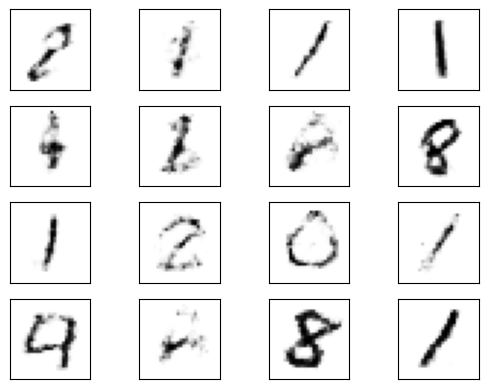

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from model import model
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

hidden_dim = 64

model = model()
_, _, train_mode, z, _, _ = model.encoder(hidden_dim)
decoder_output = model.decoder(z)

saver = tf.compat.v1.train.Saver()
sess = tf.compat.v1.Session()

saver.restore(sess, './Model_VAE_100')
print("-> Checkpoints are restored from model")

randoms = [np.random.normal(0, 1, hidden_dim) for _ in range(100)]

print("-> Generation is started.")

images = sess.run(decoder_output, feed_dict = {z: randoms, train_mode: False})
images = [np.reshape(images[i], [28, 28]) for i in range(len(images))]

import matplotlib.pyplot as plt
def save_plot_2(examples,n):

  for i in range(n):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(examples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])
    plt.savefig("Generated_images_MAY_30")
save_plot_2(images,16)
sess.close()

In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt
#from model import model
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

hidden_dim = 64

model = model()
_, _, train_mode, z, _, _ = model.encoder(hidden_dim)
decoder_output = model.decoder(z)

saver = tf.compat.v1.train.Saver()
sess = tf.compat.v1.Session()

saver.restore(sess, './Model_10')
print("-> Checkpoints are restored from model")

randoms = [np.random.normal(0, 1, hidden_dim) for _ in range(100)]

print("-> Generation is started.")

images = sess.run(decoder_output, feed_dict = {z: randoms, train_mode: False})
images = [np.reshape(images[i], [28, 28]) for i in range(len(images))]

# https://medium.com/the-data-science-publication/how-to-plot-mnist-digits-using-matplotlib-65a2e0cc068
num_row, num_col = 10, 10
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
  ax = axes[i//num_col, i%num_col]
  ax.imshow(images[i], cmap='gray')
  ax.set_title('image {}'.format(i))
plt.tight_layout()
file_name = "generated_images_FINAL_VAE.png"
plt.savefig(file_name)
print("-> Generated images are saved in " + file_name)

#sess.close()

<ipython-input-3-0761fb2ee6e4>:13: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstm, _ = tf.compat.v1.nn.dynamic_rnn(tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_dim), self.x, dtype=tf.float32)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


----- Encoder -----
input hidden_dim:  64
input x:  (None, 28, 28)
lstm:  (None, 28, 64)
flatten_lstm:  (None, 1792)
mu:  (None, 64)
sigma:  (None, 64)
epsilon:  (None, 64)
z:  (None, 64)
----- Decoder -----
input z:  (None, 64)
1. fc:  (None, 98)
2. fc:  (None, 196)
2. reshaped_fc:  (None, 14, 14, 1)
3. tconv:  (None, 14, 14, 64)
3. dropout:  (None, 14, 14, 64)
4. tconv:  (None, 14, 14, 32)
4. dropout:  (None, 14, 14, 32)
5. tconv:  (None, 28, 28, 32)
5. flatten_tconv:  (None, 25088)
6. fc:  (None, 784)
6. reshaped_output:  (None, 28, 28)
-> Checkpoints are restored from model
-> Generation is started.


UnknownError: ignored